In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import hist, show, xticks


In [2]:
import datetime as dt
from datetime import timedelta
import numpy as np
import pandas as pd
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import os
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
conn = engine.connect()

In [6]:
# reflect the existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found in the database
Base.classes.keys()

['measurement', 'station']

In [8]:
# Use inspector to view the classes that in the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
#preview columns and data types from 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#preview columns and data types from 'station' table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
#preview data from the Measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [12]:
#preview data from the Station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
# Save references to each table in the database
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create a session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [16]:
# Calculate the date 1 year ago from the last data point in the database
'''All the dates available in our database are from '2010-01-01' to '2017-08-23'
(My vacation dates will be from 2017-08-13 to 2017-08-23)'''

One_yr_ago = dt.date(2017, 8, 24) - dt.timedelta(days=365)
f'One year of history will begin on {One_yr_ago} and go through 2017-08-24'

'One year of history will begin on 2016-08-24 and go through 2017-08-24'

In [19]:
yr_mth = (func.strftime("%Y/%m", Measurement.date))

All_Measurement_rows = session.query(Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs, yr_mth)\
.order_by(Measurement.station).order_by(Measurement.date.desc()).all()

print(type(All_Measurement_rows))

<class 'list'>


In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

All_Measurement_rows2 = session.query(Measurement, yr_mth)\
.filter(Measurement.date > '2016-08-31', Measurement.date < '2017-08-24')\
.order_by(Measurement.station).order_by(Measurement.date.desc()).statement
print(All_Measurement_rows2)

SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs, strftime(:strftime_2, measurement.date) AS strftime_1 
FROM measurement 
WHERE measurement.date > :date_1 AND measurement.date < :date_2 ORDER BY measurement.station, measurement.date DESC


In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column

All_Measurement_rows2_df=pd.read_sql_query(All_Measurement_rows2, session.bind).sort_values('date')
All_Measurement_rows2_df.set_index('date')


,id,station,prcp,tobs,strftime_1
date,,,,,
2016-09-01,14617,USC00519281,0.02,80.0,2016/09
2016-09-01,2373,USC00519397,0.00,81.0,2016/09
2016-09-01,5100,USC00513117,0.00,79.0,2016/09
2016-09-01,8832,USC00517948,NaN,82.0,2016/09
2016-09-01,19210,USC00516128,0.01,77.0,2016/09
...,...,...,...,...,...
2017-08-22,19549,USC00516128,0.50,76.0,2017/08
2017-08-23,7635,USC00514830,0.00,82.0,2017/08
2017-08-23,12187,USC00519523,0.08,82.0,2017/08


In [22]:
# More narrowly defined (date & precip only) data to put into a dataframe for plotting precip for one year

In [23]:
All_Measurement_rows3 = session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date > '2016-08-31', Measurement.date < '2017-08-24')\
.order_by(Measurement.station).order_by(Measurement.date.desc()).statement
print(All_Measurement_rows3)

SELECT measurement.date, measurement.prcp 
FROM measurement 
WHERE measurement.date > :date_1 AND measurement.date < :date_2 ORDER BY measurement.station, measurement.date DESC


In [24]:
# will use this dataframe to plot last 12 months of precipitation data
All_Measurement_rows3_df=pd.read_sql_query(All_Measurement_rows3, session.bind).sort_values('date')
All_Measurement_rows3_df.set_index('date')

,prcp
date,
2016-09-01,0.02
2016-09-01,0.00
2016-09-01,0.00
2016-09-01,NaN
2016-09-01,0.01
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


In [25]:
All_Measurement_rows = session.query(Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs, yr_mth)
# Alternative method to create a DataFrame
Tot_measurement_rows_df = pd.DataFrame(All_Measurement_rows,\
columns = ['Measurement.station', 'Measurement.date', 'Measurement.prcp', 'Measurement.tobs', 'yr_mth'])
Tot_measurement_rows_df.set_index('Measurement.date')

,Measurement.station,Measurement.prcp,Measurement.tobs,yr_mth
Measurement.date,,,,
2010-01-01,USC00519397,0.08,65.0,2010/01
2010-01-02,USC00519397,0.00,63.0,2010/01
2010-01-03,USC00519397,0.00,74.0,2010/01
2010-01-04,USC00519397,0.00,76.0,2010/01
2010-01-06,USC00519397,NaN,73.0,2010/01
...,...,...,...,...
2017-08-19,USC00516128,0.09,71.0,2017/08
2017-08-20,USC00516128,NaN,78.0,2017/08
2017-08-21,USC00516128,0.56,76.0,2017/08


In [26]:
# """
# =========================================================================
# Below is the plotting of Precipitation for one year from end of data 
# =========================================================================
# """

In [27]:
print(type(All_Measurement_rows3_df))

<class 'pandas.core.frame.DataFrame'>


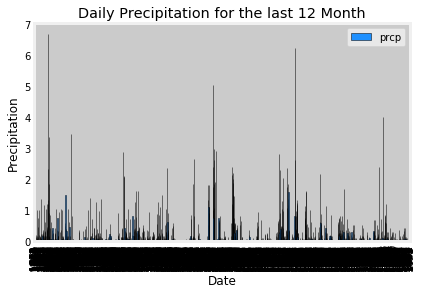

<Figure size 864x720 with 0 Axes>

In [28]:
# precip_chart = precip1_data_df2.plot(kind="bar", facecolor="dodgerblue", edgecolor='black')
precip_chart = All_Measurement_rows3_df.plot(kind='bar', facecolor='dodgerblue', edgecolor='black')
plt.title("Daily Precipitation for the last 12 Month")
precip_chart.set_xlabel("Date")
precip_chart.set_ylabel("Precipitation")

plt.savefig("Daily_Precip.png")
plt.rc('figure', figsize=(12, 10))
plt.show()
plt.tight_layout()


In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
All_Measurement_rows3_df.describe()

,prcp
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Weather Station Analysis

In [31]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id, Station.station, Station.name).order_by(Station.id).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US'),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (4, 'USC00517948', 'PEARL CITY, HI US'),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US'),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [32]:
numofstations = session.query(func.count(Station.station)).order_by(Station.id).all()
f" There are {numofstations[0][0]} monitoring stations."

' There are 9 monitoring stations.'

In [33]:
""" *****  List the stations and observation counts in descending order. ***** """
sta_list1 = []
# same_sta1 = session.query(Measurement.station, func.count(Measurement.date), Measurement.prcp, Measurement.tobs,\
#        Station.station, Station.name).filter(Measurement.station == Station.station).group_by(Measurement.station)\
# .order_by(Measurement.station).all()

same_sta1 = session.query(Measurement.station, func.count(Measurement.date), Station.name).filter(Measurement.station == Station.station).group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.date))).all()
for sta1 in same_sta1:
    (station, date_count, name) = sta1
    sta_list1.append(sta1)
#     print(sta1)
sta_list1

[('USC00519281', 2772, 'WAIHEE 837.5, HI US'),
 ('USC00519397', 2724, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 2709, 'KANEOHE 838.1, HI US'),
 ('USC00519523', 2669, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00516128', 2612, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 2202, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00511918', 1979, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00517948', 1372, 'PEARL CITY, HI US'),
 ('USC00518838', 511, 'UPPER WAHIAWA 874.3, HI US')]

In [34]:
print(type(sta_list1))

<class 'list'>


In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [36]:
""" *****  List the stations and observation counts in descending order using Pandas. ***** """

sta1_df = pd.DataFrame(sta_list1, columns =['Station', 'Measurement_Date_Count', 'Station_Name'])
sta1_df.head(15)

,Station,Measurement_Date_Count,Station_Name
0,USC00519281,2772,"WAIHEE 837.5, HI US"
1,USC00519397,2724,"WAIKIKI 717.2, HI US"
2,USC00513117,2709,"KANEOHE 838.1, HI US"
3,USC00519523,2669,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,USC00516128,2612,"MANOA LYON ARBO 785.2, HI US"
5,USC00514830,2202,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
6,USC00511918,1979,"HONOLULU OBSERVATORY 702.2, HI US"
7,USC00517948,1372,"PEARL CITY, HI US"
8,USC00518838,511,"UPPER WAHIAWA 874.3, HI US"


In [37]:
""" *****  The Station with the highest number of observations by Date Count is Station USC00519281  ***** """
sta1_df.head(1)

,Station,Measurement_Date_Count,Station_Name
0,USC00519281,2772,"WAIHEE 837.5, HI US"


In [38]:
# Alternative way to get tobs counts by station
# All_tobs_counts = sta_df['Station_Station#'].value_counts()
All_tobs_counts = Tot_measurement_rows_df['Measurement.station'].value_counts()
All_tobs_counts

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: Measurement.station, dtype: int64

In [39]:
f"Station with highest number of  TEMP observations by Date Count is Station {All_tobs_counts.index[0]}."

'Station with highest number of  TEMP observations by Date Count is Station USC00519281.'

In [40]:
# Create a query to ** JOIN ** both "Measurement" and "Station" tables

sel = [Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs,\
       Station.station, Station.name]
sta_list2 = []


same_station = session.query(*sel).filter(Measurement.station == Station.station).all()
for sta in same_station:
    (station, measure_date, precip, tobs, station, name) = sta
    sta_list2.append(sta)
    
#     print(station, measure_date, precip, tobs, station, name)
#     print(type(sta))
#     print(sta)
#     sta_list2

In [41]:
sta_df = pd.DataFrame(sta_list2, columns=['Station_num', 'Date', 'Precipitation', 'Temp_Observations', 'Station_num2', 'Station_Name'])
sta_df 

,Station_num,Date,Precipitation,Temp_Observations,Station_num2,Station_Name
0,USC00519397,2010-01-01,0.08,65.0,USC00519397,"WAIKIKI 717.2, HI US"
1,USC00519397,2010-01-02,0.00,63.0,USC00519397,"WAIKIKI 717.2, HI US"
2,USC00519397,2010-01-03,0.00,74.0,USC00519397,"WAIKIKI 717.2, HI US"
3,USC00519397,2010-01-04,0.00,76.0,USC00519397,"WAIKIKI 717.2, HI US"
4,USC00519397,2010-01-06,NaN,73.0,USC00519397,"WAIKIKI 717.2, HI US"
...,...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
19546,USC00516128,2017-08-20,NaN,78.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
19547,USC00516128,2017-08-21,0.56,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
19548,USC00516128,2017-08-22,0.50,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"


In [42]:
# for reference only
print(type(sta_df))
sta_df.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Station_num', 'Date', 'Precipitation', 'Temp_Observations',
       'Station_num2', 'Station_Name'],
      dtype='object')

In [43]:
# for reference only
sta_df.count()

Station_num          19550
Date                 19550
Precipitation        18103
Temp_Observations    19550
Station_num2         19550
Station_Name         19550
dtype: int64

In [44]:
# for reference only
sta_df.describe()

,Precipitation,Temp_Observations
count,18103.000000,19550.000000
mean,0.160644,73.097954
std,0.468746,4.523527
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


In [45]:
# rename column headers
sta_df.columns = ['Measurement_station#', 'Measurement_Date', 'Precipitation',\
                  'Temp_Observation', 'Station_Station#', 'Station_Name'] 
sta_df

,Measurement_station#,Measurement_Date,Precipitation,Temp_Observation,Station_Station#,Station_Name
0,USC00519397,2010-01-01,0.08,65.0,USC00519397,"WAIKIKI 717.2, HI US"
1,USC00519397,2010-01-02,0.00,63.0,USC00519397,"WAIKIKI 717.2, HI US"
2,USC00519397,2010-01-03,0.00,74.0,USC00519397,"WAIKIKI 717.2, HI US"
3,USC00519397,2010-01-04,0.00,76.0,USC00519397,"WAIKIKI 717.2, HI US"
4,USC00519397,2010-01-06,NaN,73.0,USC00519397,"WAIKIKI 717.2, HI US"
...,...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
19546,USC00516128,2017-08-20,NaN,78.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
19547,USC00516128,2017-08-21,0.56,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
19548,USC00516128,2017-08-22,0.50,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"


### Most Active Weather Station Data 

In [46]:
# Using the station id (USC00519281) from the previous query of the most active station, calculate: 
# lowest temperature recorded, 
# highest temperature recorded, and 
# average temperature

# Choose the station with the highest number of temperature observations.(this was determined earlier = USC00519281)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [47]:
# Station USC00519281 had the highest number of Temp observations
USC00519281_list = engine.execute('SELECT station, date, prcp, tobs FROM measurement where station == "USC00519281" order by date ').fetchall()
print(type(USC00519281_list))
USC00519281_list
USC00519281_list_df = pd.DataFrame(USC00519281_list, columns = ['station', 'date', 'precip', 'tobs'])
USC00519281_list_df

<class 'list'>


,station,date,precip,tobs
0,USC00519281,2010-01-01,0.15,70.0
1,USC00519281,2010-01-02,0.00,62.0
2,USC00519281,2010-01-03,0.00,74.0
3,USC00519281,2010-01-04,0.00,75.0
4,USC00519281,2010-01-05,0.00,74.0
...,...,...,...,...
2767,USC00519281,2017-08-14,0.00,77.0
2768,USC00519281,2017-08-15,0.32,77.0
2769,USC00519281,2017-08-16,0.12,76.0
2770,USC00519281,2017-08-17,0.01,76.0


In [48]:
# Station USC00519281 Temp Observation count
tobs_counts = USC00519281_list_df['station'].value_counts()
tobs_counts

f"Weather Station {tobs_counts.index[0]} had {tobs_counts [0]} Temperature observations, the highest by Date Count."

'Weather Station USC00519281 had 2772 Temperature observations, the highest by Date Count.'

In [49]:
# Station USC00519281 min temp reading
USC00519281_min_tobs = USC00519281_list_df["tobs"].min()
USC00519281_min_tobs

f"Weather Station {tobs_counts.index[0]} had a minimum temperature reading of {USC00519281_min_tobs} degrees fahrenheit."

'Weather Station USC00519281 had a minimum temperature reading of 54.0 degrees fahrenheit.'

In [50]:
# Station USC00519281 max temp reading
USC00519281_max_tobs = USC00519281_list_df["tobs"].max()
USC00519281_max_tobs

f"Weather Station {tobs_counts.index[0]} had a maximum temperature reading of {USC00519281_max_tobs} degrees fahrenheit."

'Weather Station USC00519281 had a maximum temperature reading of 85.0 degrees fahrenheit.'

In [51]:
# Station USC00519281 avg temp during last year
USC00519281_avg_tobs = USC00519281_list_df["tobs"].mean()
USC00519281_avg_tobs

f"Weather Station {tobs_counts.index[0]} had a average temperature reading of {round(USC00519281_avg_tobs)} degrees fahrenheit."

'Weather Station USC00519281 had a average temperature reading of 72 degrees fahrenheit.'

In [52]:
# Query the last 12 months of temperature observation data for station USC00519281 and plot the results as a histogram
# Temperature readings are from "2016-08-24" to "2017-08-24"

USC00519281_list2 = engine.execute\
('SELECT date, tobs FROM measurement where station == "USC00519281" and \
date Between "2016-08-24" and "2017-08-24" order by date').fetchall()

# print(type(USC00519281_list2))
# USC00519281_list2
USC00519281_list_df3 = pd.DataFrame(USC00519281_list2, columns = ['date', 'tobs'])
USC00519281_list_df3.sort_values('date')
USC00519281_list_df3.set_index('date')
# USC00519281_list_df3

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


###  Quick and dity histogram to  get rough idea of how the data will plot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5754A79E8>]],
      dtype=object)

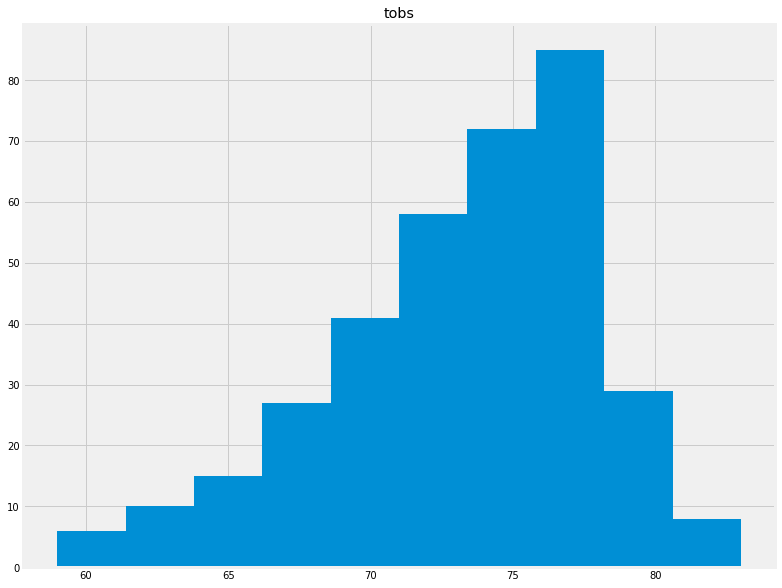

In [54]:
USC00519281_list_df3.hist()

### Histogram of Station USC00519281 Temperature Observation readings

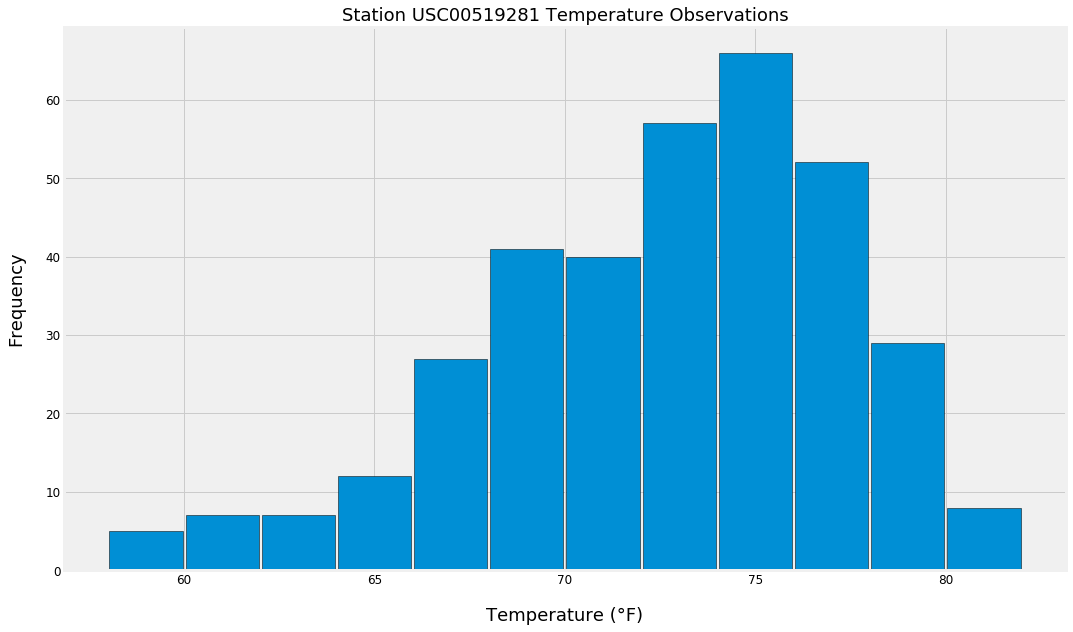

In [55]:
# Histogram of Station USC00519281 Temperature Observation readings Between "2016-08-24" and "2017-08-24" using 12 bins

ax = USC00519281_list_df3.hist(column="tobs", bins=12, align ="left", figsize=(16,10),\
ylabelsize=12, xlabelsize=12, rwidth=.96, edgecolor='black')

ax = ax[0]
for x in ax:
        # Set Title
    x.set_title("Station USC00519281 Temperature Observations", size=18)
        # Set x-axis label
    x.set_xlabel("Temperature (°F)", labelpad=20, size=18)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, size=18)
        
# fig.savefig("Histogram of Salary Distribution2.png")
plt.savefig("Station_USC00519281_TempObs.png")

## Optional Challenge Assignment

##### I have two methods below for returning the Minimum, Average and Maximum temperatures (°F) for my chosen vacaton dates

In [56]:
from sqlalchemy import between
from sqlalchemy.sql import and_

# vacation start and end dates
start_date = ('2017-08-13')
end_date = ('2017-08-23')

Tmin=[]
Tavg=[]
Tmax=[]

Tempresults = session.query\
    (Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
    .filter(Measurement.date >=start_date, Measurement.date <=end_date).all()

Tmin = [result[1] for result in Tempresults]
Tavg = [result[2] for result in Tempresults]
Tmax = [result[3] for result in Tempresults]

# function usage 
# print(Tmin [0], Tavg [0], Tmax [0])

print (f"The historical Minimum, Average and Maximum temperatures (°F) for my chosen vacaton dates")
print (f"of 2017-08-13 thru 2017-08-23 are: {(Tmin [0], Tavg [0], Tmax [0])} respectively.")

The historical Minimum, Average and Maximum temperatures (°F) for my chosen vacaton dates
of 2017-08-13 thru 2017-08-23 are: (70.0, 78.71111111111111, 85.0) respectively.


In [57]:
# This function called "calc_temps" will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
#     """
#     TMIN, TAVG, and TMAX for a list of dates.
#     Args:start_date (string): A date string in the format %Y-%m-%d
#          end_date (string): A date string in the format %Y-%m-%d
#     Returns:  TMIN, TAVE, and TMAX
# 

# using calc_temps function to get Tmin, Tavg and Tmax values for vacation dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
        .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2017-08-13', '2017-08-23'))

[(70.0, 78.71111111111111, 85.0)]


In [58]:
# Create a query that will calculate the "DAILY NORMALS"
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    Args:
        date (str): A date string in the format '%m-%d'
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    """
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("08-01")

[(67.0, 75.54, 83.0)]